<font size="3">Model 1: Using Var_Fx, Var_Fy, Var_Fz, Corr_FxFy, Corr_FxFz, Corr_FyFz</font>'

Epoch 1/100
426/426 [==============================] - 1s 1ms/step - loss: 2.0350 - accuracy: 0.2793 - val_loss: 1.8037 - val_accuracy: 0.3958 - lr: 0.0010
Epoch 2/100
426/426 [==============================] - 0s 824us/step - loss: 1.6810 - accuracy: 0.4038 - val_loss: 1.6081 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 3/100
426/426 [==============================] - 0s 793us/step - loss: 1.5292 - accuracy: 0.4507 - val_loss: 1.5255 - val_accuracy: 0.4792 - lr: 0.0010
Epoch 4/100
426/426 [==============================] - 0s 737us/step - loss: 1.4402 - accuracy: 0.4648 - val_loss: 1.4365 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 5/100
426/426 [==============================] - 0s 810us/step - loss: 1.3698 - accuracy: 0.5235 - val_loss: 1.3577 - val_accuracy: 0.5208 - lr: 0.0010
Epoch 6/100
426/426 [==============================] - 0s 746us/step - loss: 1.3131 - accuracy: 0.5282 - val_loss: 1.2982 - val_accuracy: 0.5833 - lr: 0.0010
Epoch 7/100
426/426 [==============================] -

Epoch 52/100
426/426 [==============================] - 0s 746us/step - loss: 0.8157 - accuracy: 0.7089 - val_loss: 0.9617 - val_accuracy: 0.6458 - lr: 1.0000e-05
Epoch 53/100
426/426 [==============================] - 0s 753us/step - loss: 0.8159 - accuracy: 0.7300 - val_loss: 0.9623 - val_accuracy: 0.6458 - lr: 1.0000e-05
Epoch 54/100
426/426 [==============================] - 0s 739us/step - loss: 0.8351 - accuracy: 0.7136 - val_loss: 0.9624 - val_accuracy: 0.6458 - lr: 1.0000e-05
Epoch 55/100
426/426 [==============================] - 0s 755us/step - loss: 0.8162 - accuracy: 0.7300 - val_loss: 0.9624 - val_accuracy: 0.6458 - lr: 1.0000e-06
Epoch 56/100
426/426 [==============================] - 0s 744us/step - loss: 0.8497 - accuracy: 0.6901 - val_loss: 0.9624 - val_accuracy: 0.6458 - lr: 1.0000e-06
Epoch 57/100
426/426 [==============================] - 0s 748us/step - loss: 0.8040 - accuracy: 0.7160 - val_loss: 0.9624 - val_accuracy: 0.6458 - lr: 1.0000e-06
Epoch 58/100
426/426 [

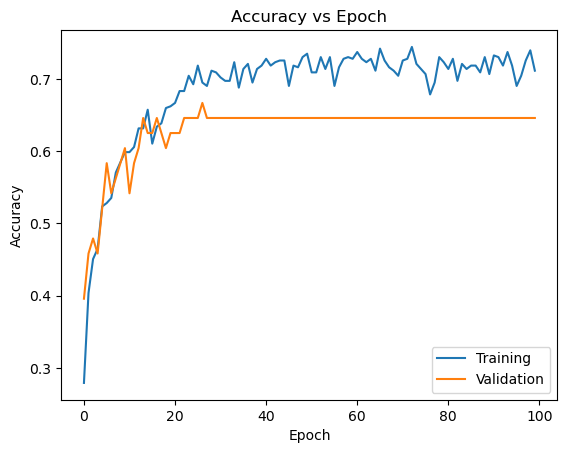

4/4 [==============================] - 0s 1ms/step - loss: 1.0913 - accuracy: 0.5798
Test Loss: 1.0913350582122803
Test Accuracy: 0.5798319578170776
4/4 [==============================] - 0s 667us/step


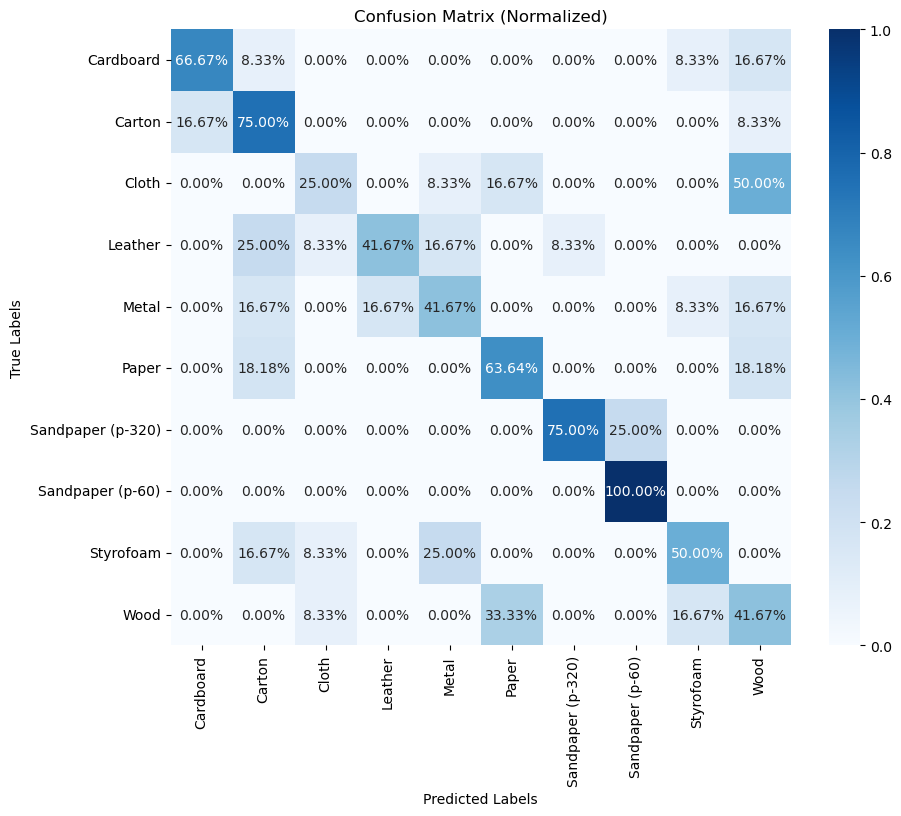

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os, time

# Specify the directory path
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_summary.csv'

df = pd.read_csv(data_dir)

# Split features and target variable
features = df[['Var_Fx', 'Var_Fy', 'Var_Fz', 'Corr_FxFy', 'Corr_FxFz', 'Corr_FyFz']]
target = df['Material']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Save the trained scaler
scaler_filename = './scalar files/standard_scaler_1.pkl'
joblib.dump(scaler, scaler_filename)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_encoded, test_size=0.2,                                                  
                                                    stratify=target_encoded, random_state=66)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=66)

# Convert the target back to one-hot encoding for training, validation, and testing sets
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)


# Define the input layer
inputs = Input(shape=(features.shape[1]))

# Define the hidden layers
x = Dense(256, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)

# Define the output layer
outputs = Dense(10, activation='softmax')(x)

# Previous paper NN model
#x= Dense(133)(inputs)
#x= Dropout(0.3)(x)
#x = keras.layers.Activation('relu')(x)
#
## Define the output layer
#outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

# Define the start time
start_time = time.time()

# Train the model with validation data
history = model.fit(X_train, y_train_onehot, callbacks=[reduce_lr], 
                    epochs=30, batch_size=1, validation_data=(X_val, y_val_onehot))

# Calculate the total time for training
end_time = time.time()
training_time = end_time - start_time
print("Total Training Time: {:.2f} seconds".format(training_time))

# Plot accuracy vs epoch for training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predicted labels on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels back to original form
y_pred_original_labels = label_encoder.inverse_transform(y_pred_labels)

# Save label encoder classes
np.save('./label encoder files/label_encoder_classes_1.npy', label_encoder.classes_)

# Compute confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Compute the sum of true labels for each class
class_totals = np.sum(conf_matrix, axis=1, keepdims=True)

# Normalize the confusion matrix to represent percentages
conf_matrix_norm = conf_matrix / class_totals

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

model.save('./model files/material_classification_model_1.h5')

<font size="3">Model 2: K-Fold Split using Var_Fx, Var_Fy, Var_Fz, Corr_FxFy, Corr_FxFz, Corr_FyFz</font>'

Processing fold: 1
Epoch 1/20
340/340 [==============================] - 1s 1ms/step - loss: 1.9733 - accuracy: 0.2824 - val_loss: 1.7142 - val_accuracy: 0.3721 - lr: 0.0010
Epoch 2/20
340/340 [==============================] - 0s 891us/step - loss: 1.4980 - accuracy: 0.4441 - val_loss: 1.4903 - val_accuracy: 0.5116 - lr: 0.0010
Epoch 3/20
340/340 [==============================] - 0s 888us/step - loss: 1.3359 - accuracy: 0.5206 - val_loss: 1.6094 - val_accuracy: 0.4419 - lr: 0.0010
Epoch 4/20
340/340 [==============================] - 0s 885us/step - loss: 1.2612 - accuracy: 0.5265 - val_loss: 1.3789 - val_accuracy: 0.5581 - lr: 0.0010
Epoch 5/20
340/340 [==============================] - 0s 882us/step - loss: 1.1495 - accuracy: 0.5706 - val_loss: 1.3765 - val_accuracy: 0.5233 - lr: 0.0010
Epoch 6/20
340/340 [==============================] - 0s 876us/step - loss: 1.0921 - accuracy: 0.5706 - val_loss: 1.2078 - val_accuracy: 0.6047 - lr: 0.0010
Epoch 7/20
340/340 [=====================

Epoch 11/20
341/341 [==============================] - 0s 977us/step - loss: 0.4728 - accuracy: 0.8475 - val_loss: 0.3544 - val_accuracy: 0.9176 - lr: 1.0000e-08
Epoch 12/20
341/341 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.8475 - val_loss: 0.3544 - val_accuracy: 0.9176 - lr: 1.0000e-09
Epoch 13/20
341/341 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.8475 - val_loss: 0.3544 - val_accuracy: 0.9176 - lr: 1.0000e-09
Epoch 14/20
341/341 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.8475 - val_loss: 0.3544 - val_accuracy: 0.9176 - lr: 1.0000e-09
Epoch 15/20
341/341 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.8475 - val_loss: 0.3544 - val_accuracy: 0.9176 - lr: 1.0000e-09
Epoch 16/20
341/341 [==============================] - 0s 874us/step - loss: 0.4728 - accuracy: 0.8475 - val_loss: 0.3544 - val_accuracy: 0.9176 - lr: 1.0000e-09
Epoch 17/20
341/341 [===============

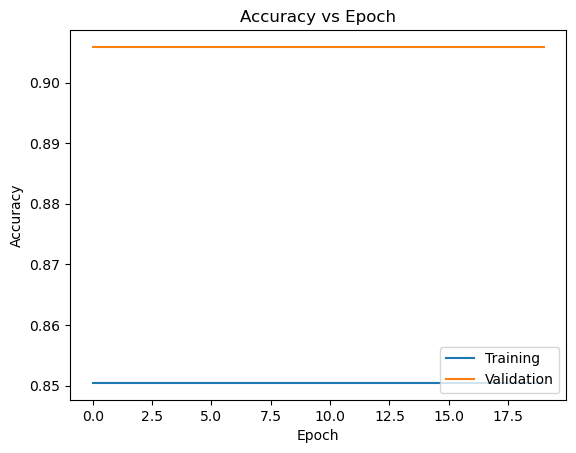

4/4 [==============================] - 0s 1ms/step - loss: 1.1369 - accuracy: 0.6639
Test Loss: 1.1368767023086548
Test Accuracy: 0.6638655662536621
4/4 [==============================] - 0s 667us/step


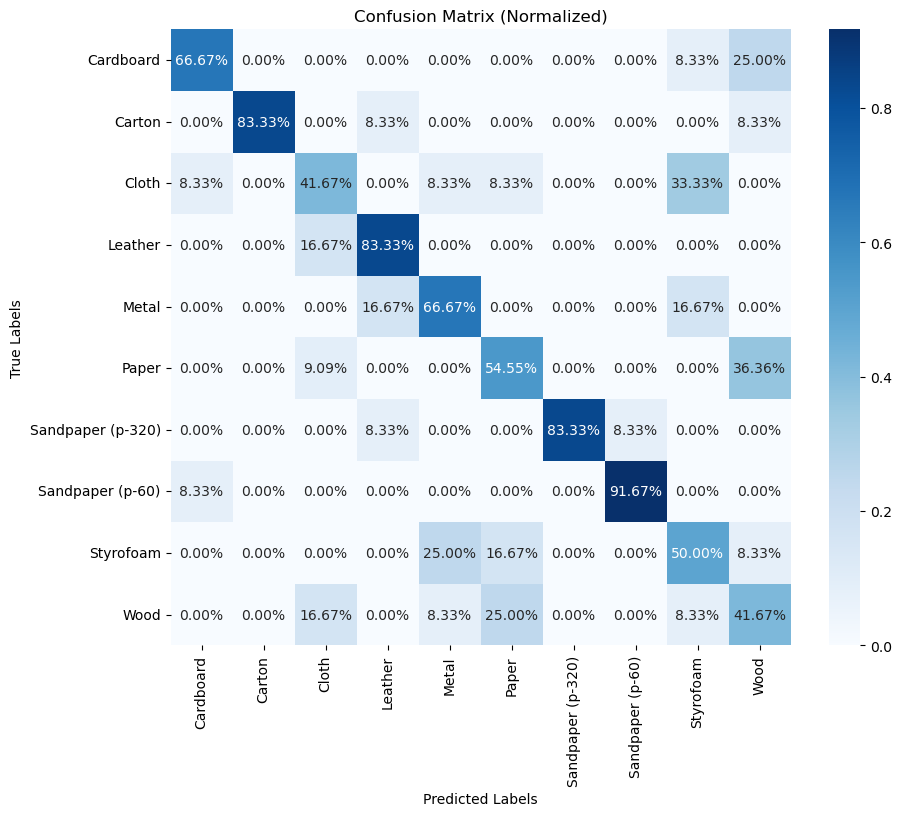

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os, time

# Specify the directory path
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_summary.csv'

df = pd.read_csv(data_dir)

# Split features and target variable
features = df[['Var_Fx', 'Var_Fy', 'Var_Fz', 'Corr_FxFy', 'Corr_FxFz', 'Corr_FyFz']]
target = df['Material']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Save the trained scaler
scaler_filename = './scalar files/standard_scaler_2.pkl'
joblib.dump(scaler, scaler_filename)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_encoded, test_size=0.2, 
                                                    stratify=target_encoded, random_state=6)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=6)

# Convert the target back to one-hot encoding for training, validation, and testing sets
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)


# Define the input layer
inputs = Input(shape=(features.shape[1]))

# Define the hidden layers
x = Dense(256, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)

# Define the output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

# Specify the number of folds for cross-validation
n_splits = 5

# Initialize a list to store the accuracy values for each fold
fold_accuracies = []

# Create a KFold object
kf = KFold(n_splits=n_splits)

# Define the start time
start_time = time.time()

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Processing fold: {fold+1}")
    # Get the training and validation data for the current fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_onehot[train_index], y_train_onehot[val_index]

    # Train the model on the training data for the current fold
    history = model.fit(X_train_fold, y_train_fold, callbacks=[reduce_lr], 
                        epochs=20, batch_size=1, validation_data=(X_val_fold, y_val_fold))

    # Save the weights of the best model for the current fold
    best_model_filename = f'best_model_fold_{fold}.h5'
    model.save_weights(best_model_filename)

    # Evaluate the model on the validation data for the current fold
    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    
    # Store the accuracy for the current fold
    fold_accuracies.append(accuracy)

# Calculate the total time for training
end_time = time.time()
training_time = end_time - start_time
print("Total Training Time: {:.2f} seconds".format(training_time))

# Compute the average accuracy across all folds
mean_accuracy = np.mean(fold_accuracies)

# Print the mean accuracy
print('Mean Accuracy:', mean_accuracy)
# Plot accuracy vs epoch for training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predicted labels on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels back to original form
y_pred_original_labels = label_encoder.inverse_transform(y_pred_labels)

# Save label encoder classes
np.save('./label encoder files/label_encoder_classes_2.npy', label_encoder.classes_)

# Compute confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Compute the sum of true labels for each class
class_totals = np.sum(conf_matrix, axis=1, keepdims=True)

# Normalize the confusion matrix to represent percentages
conf_matrix_norm = conf_matrix / class_totals

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

model.save('./model files/material_classification_model_2.h5')

<font size="3">Model 3: using 'Var_Fx', 'Var_Fy', 'Var_Fz', 'Frictional Coefficient', 'Fx','Fy','Fz', 'Tangential Force'</font>

Epoch 1/40
426/426 [==============================] - 1s 1ms/step - loss: 1.6051 - accuracy: 0.4272 - val_loss: 1.2223 - val_accuracy: 0.4792 - lr: 0.0010
Epoch 2/40
426/426 [==============================] - 0s 857us/step - loss: 1.1128 - accuracy: 0.5469 - val_loss: 0.9316 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/40
426/426 [==============================] - 0s 859us/step - loss: 0.8791 - accuracy: 0.6620 - val_loss: 0.7322 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/40
426/426 [==============================] - 0s 864us/step - loss: 0.7417 - accuracy: 0.7300 - val_loss: 0.7355 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 5/40
426/426 [==============================] - 0s 859us/step - loss: 0.6537 - accuracy: 0.7207 - val_loss: 0.7275 - val_accuracy: 0.6458 - lr: 0.0010
Epoch 6/40
426/426 [==============================] - 0s 857us/step - loss: 0.5820 - accuracy: 0.7606 - val_loss: 0.6124 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 7/40
426/426 [==============================] - 0s 857

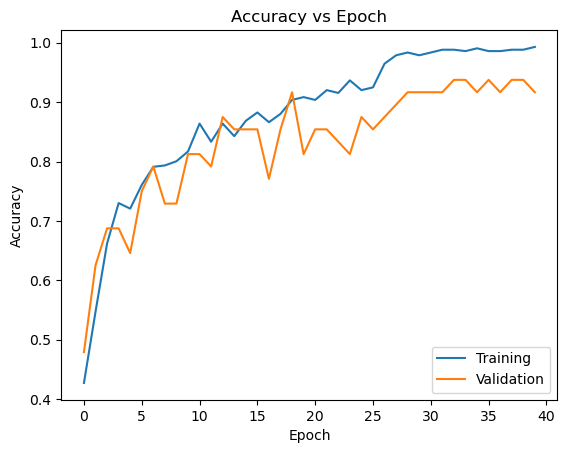

4/4 [==============================] - 0s 1ms/step - loss: 0.8201 - accuracy: 0.8067
Test Loss: 0.8201010823249817
Test Accuracy: 0.8067227005958557
4/4 [==============================] - 0s 1ms/step


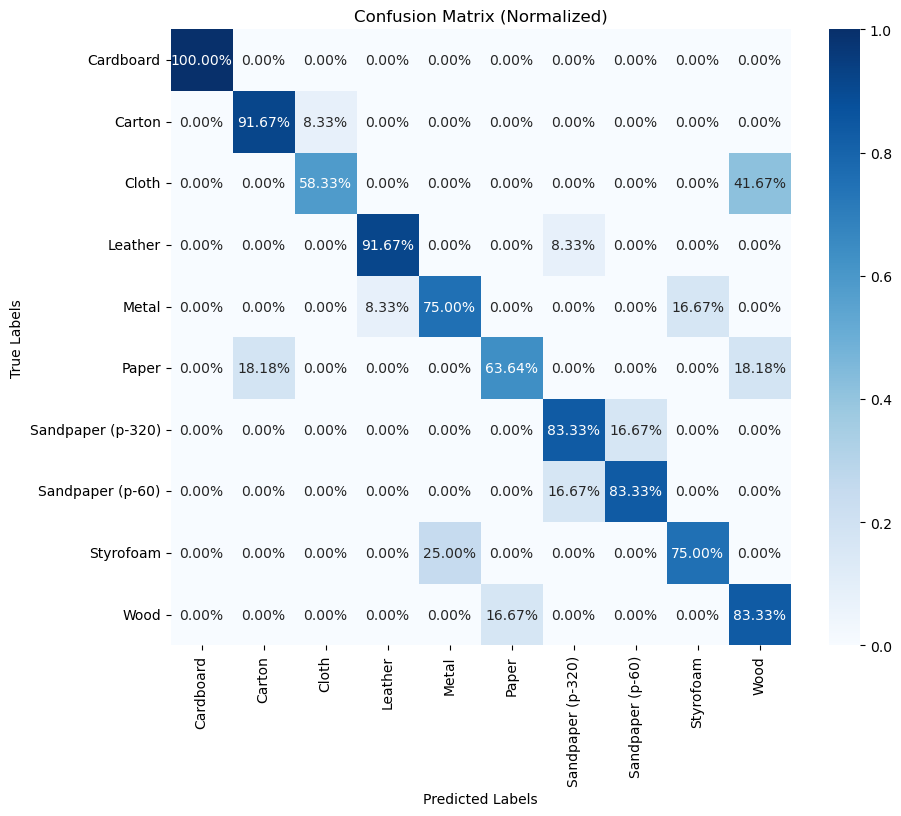

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os, time

# Specify the directory path
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_summary.csv'

df = pd.read_csv(data_dir)

# Split features and target variable
features = df[['Var_Fx', 'Var_Fy', 'Var_Fz', 'Frictional Coefficient', 'Fx','Fy','Fz', 'Tangential Force']]
target = df['Material']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Save the trained scaler
scaler_filename = './scalar files/standard_scaler_3.pkl'
joblib.dump(scaler, scaler_filename)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_encoded, test_size=0.2, 
                                                    stratify=target_encoded, random_state=66)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=66)

# Convert the target back to one-hot encoding for training, validation, and testing sets
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)


# Define the input layer
inputs = Input(shape=(features.shape[1],))

# Define the hidden layers
x = Dense(256, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)


# Define the output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

# Define the start time
start_time = time.time()

# Train the model with validation data
history = model.fit(X_train, y_train_onehot, callbacks=[reduce_lr], 
                    epochs=40, batch_size=1, validation_data=(X_val, y_val_onehot))

# Calculate the total time for training
end_time = time.time()
training_time = end_time - start_time
print("Total Training Time: {:.2f} seconds".format(training_time))

# Plot accuracy vs epoch for training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predicted labels on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels back to original form
y_pred_original_labels = label_encoder.inverse_transform(y_pred_labels)

# Save label encoder classes
np.save('./label encoder files/label_encoder_classes_3.npy', label_encoder.classes_)

# Compute confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Compute the sum of true labels for each class
class_totals = np.sum(conf_matrix, axis=1, keepdims=True)

# Normalize the confusion matrix to represent percentages
conf_matrix_norm = conf_matrix / class_totals

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

model.save('./model files/material_classification_model_3.h5')

<font size="3">Model X: Custom Loss Function using 'Var_Fx', 'Var_Fy', 'Var_Fz', 'Frictional Coefficient', 'Fx','Fy','Fz', 'Tangential Force'</font>

Epoch 1/45
426/426 [==============================] - 1s 1ms/step - loss: 1.7451 - accuracy: 0.3756 - val_loss: 1.7281 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/45
426/426 [==============================] - 0s 899us/step - loss: 1.7309 - accuracy: 0.5657 - val_loss: 1.7271 - val_accuracy: 0.6042 - lr: 0.0010
Epoch 3/45
426/426 [==============================] - 0s 932us/step - loss: 1.7210 - accuracy: 0.6268 - val_loss: 1.7183 - val_accuracy: 0.6042 - lr: 0.0010
Epoch 4/45
426/426 [==============================] - 0s 913us/step - loss: 1.7151 - accuracy: 0.6808 - val_loss: 1.7023 - val_accuracy: 0.7708 - lr: 0.0010
Epoch 5/45
426/426 [==============================] - 0s 890us/step - loss: 1.7113 - accuracy: 0.6948 - val_loss: 1.7100 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/45
426/426 [==============================] - 0s 946us/step - loss: 1.7064 - accuracy: 0.7394 - val_loss: 1.7100 - val_accuracy: 0.7083 - lr: 0.0010
Epoch 7/45
426/426 [==============================] - 0s 901

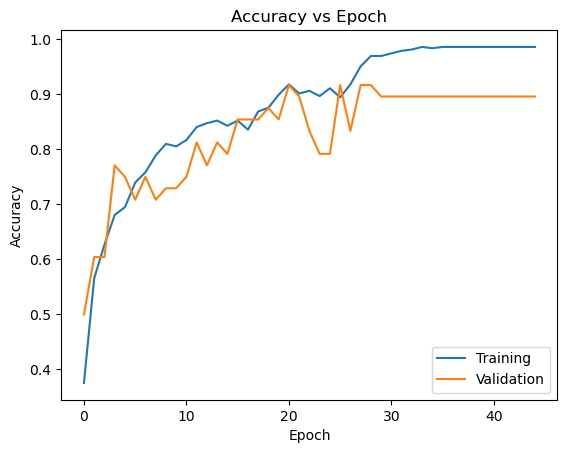

4/4 [==============================] - 0s 1ms/step - loss: 1.7011 - accuracy: 0.7983
Test Loss: 1.701086401939392
Test Accuracy: 0.7983193397521973
4/4 [==============================] - 0s 1ms/step


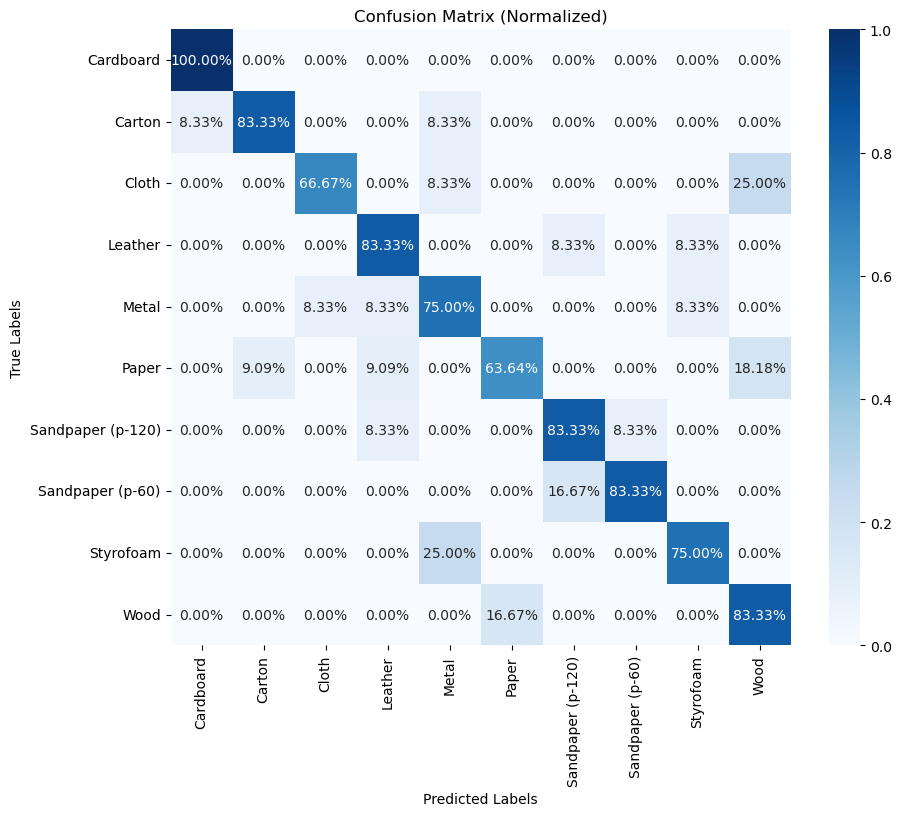

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K
import os

# Specify the directory path
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_summary.csv'

df = pd.read_csv(data_dir)

# Split features and target variable
features = df[['Var_Fx', 'Var_Fy', 'Var_Fz', 'Frictional Coefficient', 'Fx','Fy','Fz', 'Tangential Force']]
target = df['Material']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Save the trained scaler
scaler_filename = './scalar files/standard_scaler_4.pkl'
joblib.dump(scaler, scaler_filename)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_encoded, test_size=0.2, stratify=target_encoded, random_state=66)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=66)

# Convert the target back to one-hot encoding for training, validation, and testing sets
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)

# Custom loss function 
def custom_loss(X_train):
    def loss(y_true, y_pred):
        mse_loss = keras.losses.MSE(y_true, y_pred)  # Standard MSE loss
        additional_loss = K.mean(K.square(X_train[:, 7] - X_train[:, 6] * X_train[:, 3]))  # Additional loss term
        additional_loss = K.cast(additional_loss, K.floatx())
        total_loss =  additional_loss + mse_loss 
        return total_loss
    return loss

# Define the input layer
inputs = Input(shape=(features.shape[1],))

# Define the hidden layers
x = Dense(256, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)

# Previous paper NN model
#x= Dense(133)(inputs)
#x= Dropout(0.3)(x)
#x = keras.layers.Activation('relu')(x)

# Define the output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=custom_loss(X_train), metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

# Define the start time
start_time = time.time()

# Train the model with validation data
history = model.fit(X_train, y_train_onehot, callbacks=[reduce_lr], 
                    epochs=45, batch_size=1, validation_data=(X_val, y_val_onehot))

# Calculate the total time for training
end_time = time.time()
training_time = end_time - start_time
print("Total Training Time: {:.2f} seconds".format(training_time))

# Plot accuracy vs epoch for training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predicted labels on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels back to original form
y_pred_original_labels = label_encoder.inverse_transform(y_pred_labels)

# Save label encoder classes
np.save('./label encoder files/label_encoder_classes_4.npy', label_encoder.classes_)

# Compute confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Compute the sum of true labels for each class
class_totals = np.sum(conf_matrix, axis=1, keepdims=True)

# Normalize the confusion matrix to represent percentages
conf_matrix_norm = conf_matrix / class_totals

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

model.save('./model files/material_classification_model_4.h5')

<font size="3">Model 4: K-fold split using 'Var_Fx', 'Var_Fy', 'Var_Fz', 'Frictional Coefficient', 'Fx','Fy','Fz', 'Tangential Force'</font>

Processing fold: 1
Epoch 1/20
355/355 [==============================] - 1s 1ms/step - loss: 1.7974 - accuracy: 0.3070 - val_loss: 1.5658 - val_accuracy: 0.3944 - lr: 0.0010
Epoch 2/20
355/355 [==============================] - 0s 915us/step - loss: 1.3134 - accuracy: 0.5183 - val_loss: 1.2400 - val_accuracy: 0.5070 - lr: 0.0010
Epoch 3/20
355/355 [==============================] - 0s 944us/step - loss: 1.1271 - accuracy: 0.5690 - val_loss: 1.1168 - val_accuracy: 0.5915 - lr: 0.0010
Epoch 4/20
355/355 [==============================] - 0s 955us/step - loss: 0.9525 - accuracy: 0.6366 - val_loss: 0.8891 - val_accuracy: 0.7042 - lr: 0.0010
Epoch 5/20
355/355 [==============================] - 0s 930us/step - loss: 0.8440 - accuracy: 0.6620 - val_loss: 0.9107 - val_accuracy: 0.7042 - lr: 0.0010
Epoch 6/20
355/355 [==============================] - 0s 1ms/step - loss: 0.7475 - accuracy: 0.7239 - val_loss: 0.8710 - val_accuracy: 0.7183 - lr: 0.0010
Epoch 7/20
355/355 [=======================

Epoch 11/20
355/355 [==============================] - 0s 935us/step - loss: 0.2274 - accuracy: 0.9296 - val_loss: 0.1726 - val_accuracy: 0.9718 - lr: 1.0000e-08
Epoch 12/20
355/355 [==============================] - 0s 921us/step - loss: 0.2274 - accuracy: 0.9296 - val_loss: 0.1726 - val_accuracy: 0.9718 - lr: 1.0000e-09
Epoch 13/20
355/355 [==============================] - 0s 969us/step - loss: 0.2274 - accuracy: 0.9296 - val_loss: 0.1726 - val_accuracy: 0.9718 - lr: 1.0000e-09
Epoch 14/20
355/355 [==============================] - 0s 961us/step - loss: 0.2274 - accuracy: 0.9296 - val_loss: 0.1726 - val_accuracy: 0.9718 - lr: 1.0000e-09
Epoch 15/20
355/355 [==============================] - 0s 921us/step - loss: 0.2274 - accuracy: 0.9296 - val_loss: 0.1726 - val_accuracy: 0.9718 - lr: 1.0000e-09
Epoch 16/20
355/355 [==============================] - 1s 2ms/step - loss: 0.2274 - accuracy: 0.9296 - val_loss: 0.1726 - val_accuracy: 0.9718 - lr: 1.0000e-09
Epoch 17/20
355/355 [=========

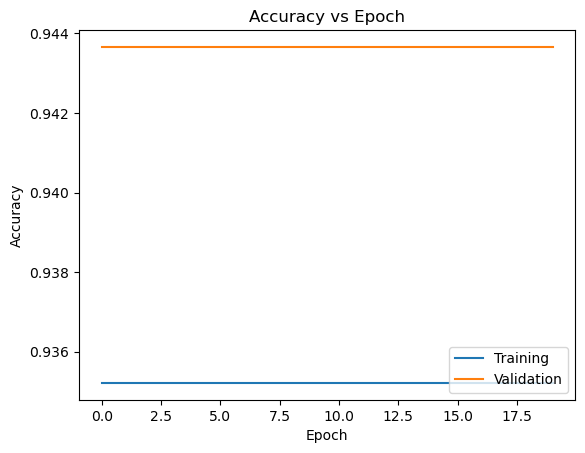

4/4 [==============================] - 0s 667us/step - loss: 0.4728 - accuracy: 0.8151
Test Loss: 0.4727836549282074
Test Accuracy: 0.8151260614395142
4/4 [==============================] - 0s 667us/step


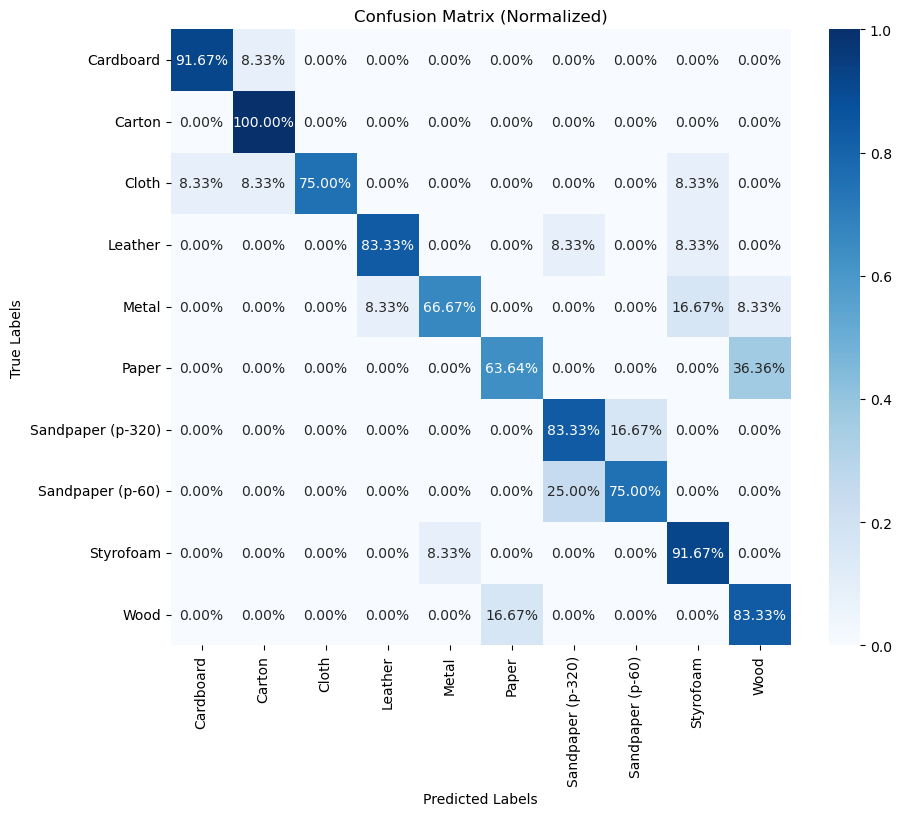

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import os

# Specify the directory path
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_summary.csv'

df = pd.read_csv(data_dir)

# Split features and target variable
features = df[[ 'Var_Fx', 'Var_Fy', 'Var_Fz', 'Frictional Coefficient', 'Fx','Fy','Fz', 'Tangential Force']]
target = df['Material']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Save the trained scaler
scaler_filename = './scalar files/standard_scaler_4.pkl'
joblib.dump(scaler, scaler_filename)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_encoded, test_size=0.2, 
                                                    stratify=target_encoded, random_state=6)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=6)

# Convert the target back to one-hot encoding for training, validation, and testing sets
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)

# Define the input layer
inputs = Input(shape=(features.shape[1],))

# Define the hidden layers
x = Dense(256, activation='relu')(inputs)
x = Dense(64, activation='relu')(x)

# Define the output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

# Specify the number of folds for cross-validation
n_splits = 6

# Specify the number of desired folds to train
desired_folds = 6

# Create a KFold object
kf = KFold(n_splits=n_splits)

# Define the start time
start_time = time.time()

# Iterate over the folds
for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    print(f"Processing fold: {fold+1}")
    # Get the training and validation data for the current fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train_onehot[train_index], y_train_onehot[val_index]

    # Train the model on the training data for the current fold
    history = model.fit(X_train_fold, y_train_fold, callbacks=reduce_lr, 
                        epochs=20, batch_size=1, validation_data=(X_val_fold, y_val_fold))

    # Save the weights of the best model for the current fold
    best_model_filename = f'best_model_fold_{fold}.h5'
    model.save_weights(best_model_filename)

    # Evaluate the model on the validation data for the current fold
    _, accuracy = model.evaluate(X_val_fold, y_val_fold)
    
    # Store the accuracy for the current fold
    fold_accuracies.append(accuracy)
    
    # Check if the desired number of folds has been reached
    if fold + 1 == desired_folds:
        break

# Calculate the total time for training
end_time = time.time()
training_time = end_time - start_time
print("Total Training Time: {:.2f} seconds".format(training_time))

# Compute the average accuracy across all folds
mean_accuracy = np.mean(fold_accuracies)

# Print the mean accuracy
print('Mean Accuracy:', mean_accuracy)
# Plot accuracy vs epoch for training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predicted labels on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels back to original form
y_pred_original_labels = label_encoder.inverse_transform(y_pred_labels)

# Save label encoder classes
np.save('./label encoder files/label_encoder_classes_4.npy', label_encoder.classes_)

# Compute confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Compute the sum of true labels for each class
class_totals = np.sum(conf_matrix, axis=1, keepdims=True)

# Normalize the confusion matrix to represent percentages
conf_matrix_norm = conf_matrix / class_totals

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

model.save('./model files/material_classification_model_4.h5')

<font size="3">Model 5: Dual NN: Part1: Predicts Frictional Coefficient, Part2: Uses Predicted Mu to Classify</font>

Epoch 1/15
15/15 [==============================] - 1s 1ms/step - loss: 0.0648
Epoch 2/15
15/15 [==============================] - 0s 929us/step - loss: 0.0136
Epoch 3/15
15/15 [==============================] - 0s 929us/step - loss: 0.0067
Epoch 4/15
15/15 [==============================] - 0s 929us/step - loss: 0.0031
Epoch 5/15
15/15 [==============================] - 0s 929us/step - loss: 0.0017
Epoch 6/15
15/15 [==============================] - 0s 857us/step - loss: 0.0013
Epoch 7/15
15/15 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 8/15
15/15 [==============================] - 0s 857us/step - loss: 9.6629e-04
Epoch 9/15
15/15 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 10/15
15/15 [==============================] - 0s 929us/step - loss: 9.8918e-04
Epoch 11/15
15/15 [==============================] - 0s 929us/step - loss: 9.8581e-04
Epoch 12/15
15/15 [==============================] - 0s 857us/step - loss: 0.0012
Epoch 13/15
15/15 [

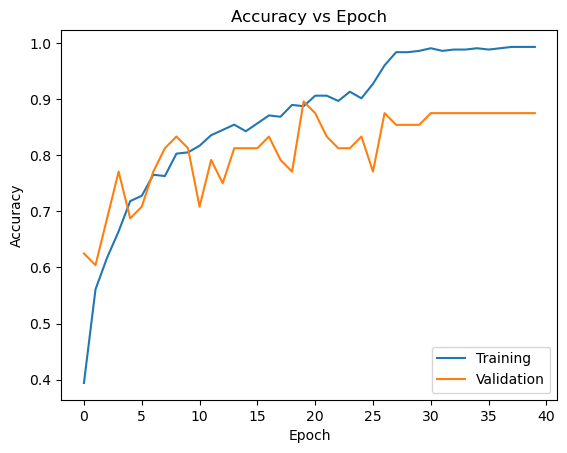

4/4 [==============================] - 0s 1ms/step - loss: 0.7125 - accuracy: 0.8067
Test Loss: 0.7124737501144409
Test Accuracy: 0.8067227005958557
4/4 [==============================] - 0s 667us/step


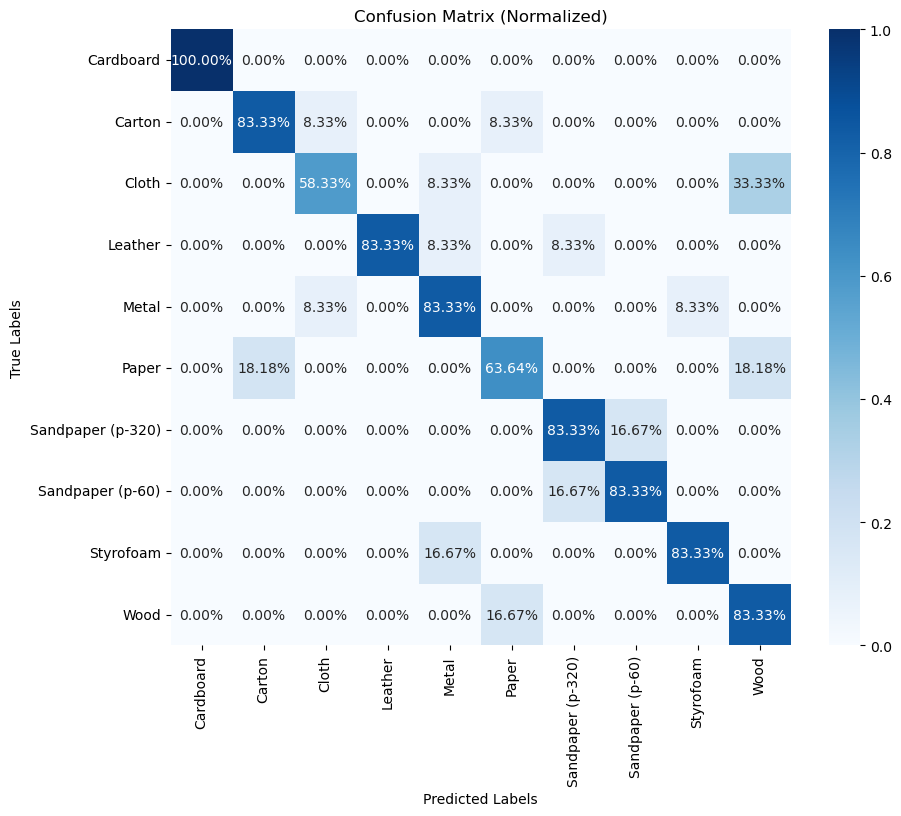

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K
import os, time


# Specify the directory paths
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_summary.csv'
output_file = '../../preprocessed dataset/filtered dataset/full_dataset_summary_pred.csv'

# Read the data from the CSV file
df = pd.read_csv(data_dir)

# Split features and target variable
features = df[['Tangential Force', 'Fz']]
target = df['Frictional Coefficient']

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)

# Custom loss function 
def custom_loss(X_train):
    def loss(y_true, y_pred):
        mse_loss = keras.losses.MSE(y_true, y_pred)  # MSE loss
        additional_loss = K.mean(K.square((X_train[:, 0] - (y_pred) * X_train[:, 1])
                                          -(X_train[:, 0] - (y_true) * X_train[:, 1])))  # Additional loss term
        additional_loss = K.cast(additional_loss, K.floatx())
        total_loss =  mse_loss + additional_loss
        return total_loss
    return loss

# Define the input layer
inputs = Input(shape=(features.shape[1],))

# Define the hidden layers
x = Dense(256, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)

# Define the output layer
outputs = Dense(1)(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=custom_loss(features_normalized))

# Define the start time
start_time = time.time()

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

# Compute predictions for the whole dataset
df['Pred Frictional Coefficient'] = model.predict(features_normalized)

# Save the modified dataset
df.to_csv(output_file, index=False)

# Specify the directory path
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_summary_pred.csv'
df = pd.read_csv(data_dir)
# Split features and target variable
features = df[['Var_Fx', 'Var_Fy', 'Var_Fz', 'Pred Frictional Coefficient', 'Fx','Fy', 'Tangential Force']]
target = df['Material']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Save the trained scaler
scaler_filename = './scalar files/standard_scaler_6.pkl'
joblib.dump(scaler, scaler_filename)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_encoded, test_size=0.2, 
                                                    stratify=target_encoded, random_state=66)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=66)

# Convert the target back to one-hot encoding for training, validation, and testing sets
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)

# Define the input layer
inputs = Input(shape=(features.shape[1],))

# Define the hidden layers
x = Dense(256, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)

# Define the output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

# Train the model with validation data
history = model.fit(X_train, y_train_onehot, callbacks=[reduce_lr], 
                    epochs=40, batch_size=1, validation_data=(X_val, y_val_onehot))

# Calculate the total time for training
end_time = time.time()
training_time = end_time - start_time
print("Total Training Time: {:.2f} seconds".format(training_time))

# Plot accuracy vs epoch for training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predicted labels on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels back to original form
y_pred_original_labels = label_encoder.inverse_transform(y_pred_labels)

# Save label encoder classes
np.save('./label encoder files/label_encoder_classes_6.npy', label_encoder.classes_)

# Compute confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Compute the sum of true labels for each class
class_totals = np.sum(conf_matrix, axis=1, keepdims=True)

# Normalize the confusion matrix to represent percentages
conf_matrix_norm = conf_matrix / class_totals

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

model.save('./model files/material_classification_model_6.h5')


<font size="3">Model 7: Considering whole dataset content</font>

Epoch 1/5
323/323 [==============================] - 1s 3ms/step - loss: 0.6559 - accuracy: 0.7752 - val_loss: 0.2798 - val_accuracy: 0.9055 - lr: 0.0010
Epoch 2/5
323/323 [==============================] - 1s 2ms/step - loss: 0.1791 - accuracy: 0.9474 - val_loss: 0.1128 - val_accuracy: 0.9726 - lr: 0.0010
Epoch 3/5
323/323 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9834 - val_loss: 0.0535 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 4/5
323/323 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9944 - val_loss: 0.0271 - val_accuracy: 0.9970 - lr: 0.0010
Epoch 5/5
323/323 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9975 - val_loss: 0.0163 - val_accuracy: 0.9980 - lr: 0.0010
Total Training Time: 4.34 seconds


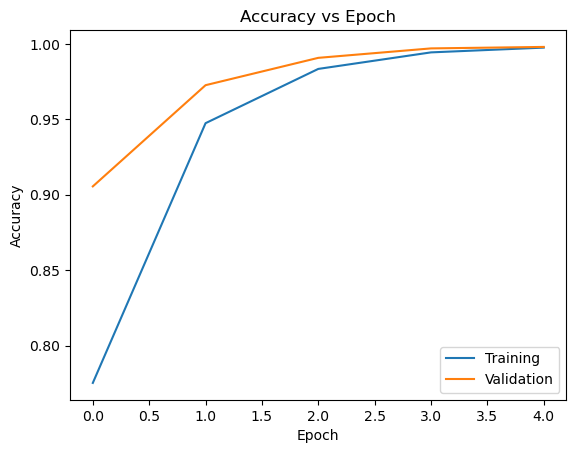

1435/1435 [==============================] - 1s 664us/step - loss: 0.0159 - accuracy: 0.9981
Test Loss: 0.01586337201297283
Test Accuracy: 0.9981485605239868
1435/1435 [==============================] - 1s 566us/step


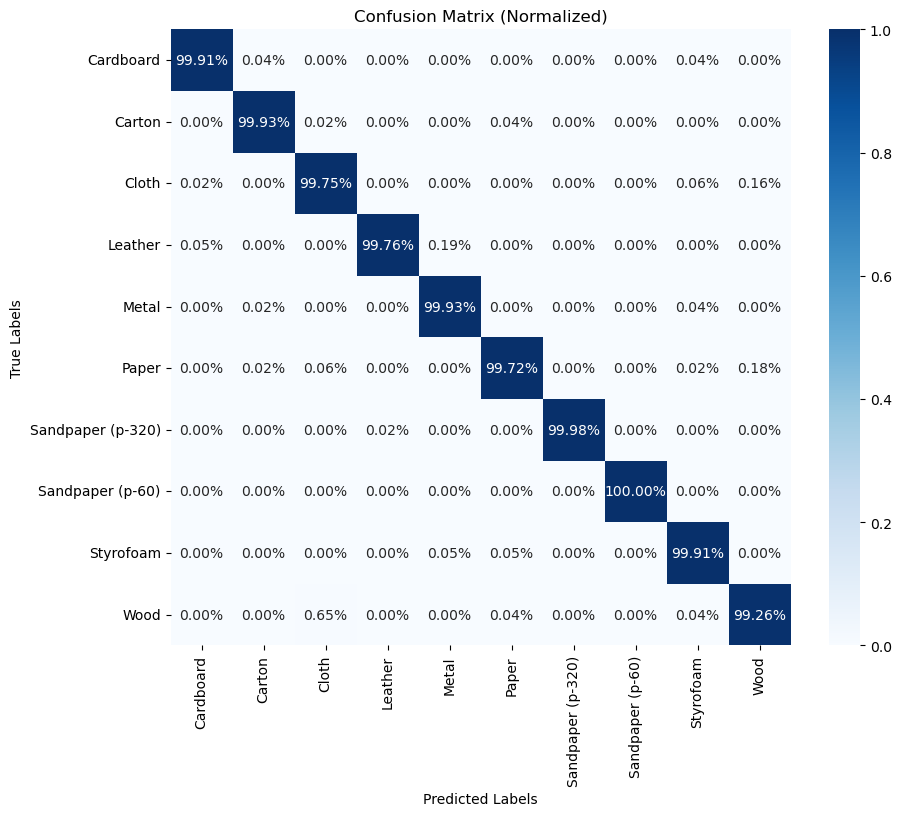

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os, time

# Specify the directory path
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_mod7_8/'

# Load and preprocess the data from multiple CSV files
df_list = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(data_dir, file_name)
        df = pd.read_csv(file_path)
        df_list.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(df_list, ignore_index=True)

# Split features and target variable
#features = df[['Var_Fx', 'Var_Fy', 'Var_Fz', 'Frictional Coefficient', 'Fx','Fy','Fz', 'Tangential Force']]
features = df[['Fx', 'VarE_Fx', 'Fy', 'VarE_Fy', 'Fz', 'Var_Fy', 'Var_Fz', 'Var_Fx', 'Corr_FxFz', 'Corr_FxFy',
               'Corr_FyFz','Tangential Force', 'VarE_Fz', 'Frictional Coefficient']]
target = df['Material']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Save the trained scaler
scaler_filename = './scalar files/standard_scaler_7.pkl'
joblib.dump(scaler, scaler_filename)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_encoded, test_size=0.2, 
                                                    stratify=target_encoded, random_state=66)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=66)

# Convert the target back to one-hot encoding for training, validation, and testing sets
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)

# Define the input layer
inputs = Input(shape=(features.shape[1],))

# Define the hidden layers
x = Dense(256, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)

# Define the output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

# Define the start time
start_time = time.time()

# Train the model with validation data
history = model.fit(X_train, y_train_onehot, callbacks=[reduce_lr], 
                    epochs=5, batch_size=512, validation_data=(X_val, y_val_onehot))
#epochs=50, batch_size=32, validation_data=(X_val, y_val_onehot))

# Calculate the total time for training
end_time = time.time()
training_time = end_time - start_time
print("Total Training Time: {:.2f} seconds".format(training_time))

# Plot accuracy vs epoch for training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predicted labels on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels back to original form
y_pred_original_labels = label_encoder.inverse_transform(y_pred_labels)

# Save label encoder classes
np.save('./label encoder files/label_encoder_classes_7.npy', label_encoder.classes_)

# Compute confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Compute the sum of true labels for each class
class_totals = np.sum(conf_matrix, axis=1, keepdims=True)

# Normalize the confusion matrix to represent percentages
conf_matrix_norm = conf_matrix / class_totals

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

model.save('./model files/material_classification_model_7.h5')

<font size="3">Model 8: Considering whole dataset content with concatanated network</font>

Epoch 1/2
323/323 [==============================] - 4s 8ms/step - loss: 0.6689 - accuracy: 0.7559 - val_loss: 0.1811 - val_accuracy: 0.9424 - lr: 0.0010
Epoch 2/2
323/323 [==============================] - 3s 8ms/step - loss: 0.0891 - accuracy: 0.9752 - val_loss: 0.0441 - val_accuracy: 0.9921 - lr: 0.0010
Total Training Time: 7.18 seconds


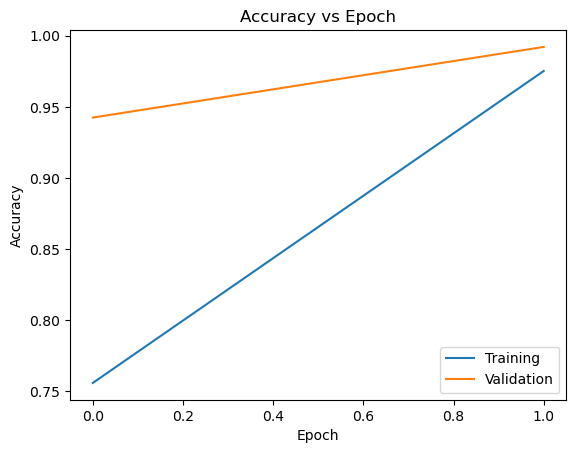

1435/1435 [==============================] - 2s 2ms/step - loss: 0.0441 - accuracy: 0.9910
Test Loss: 0.04410622641444206
Test Accuracy: 0.9909605979919434
1435/1435 [==============================] - 2s 1ms/step


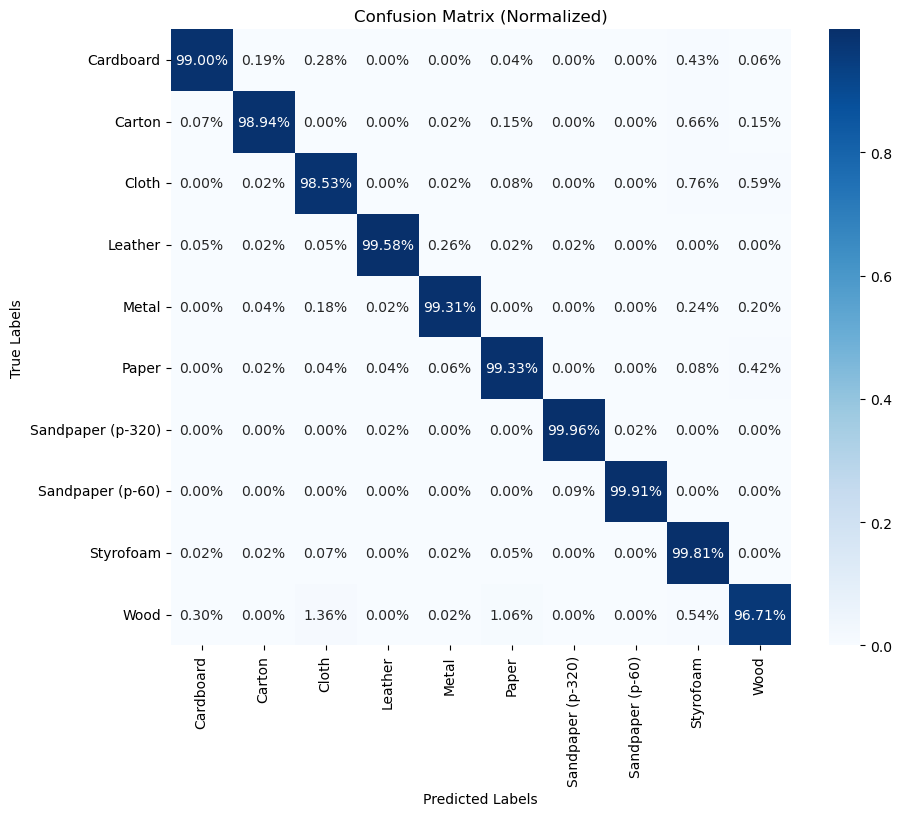

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os, time

# Specify the directory path
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_mod7_8/'

# Load and preprocess the data from multiple CSV files
df_list = []
for file_name in os.listdir(data_dir):
    if file_name.endswith('.csv'):
        file_path = os.path.join(data_dir, file_name)
        df = pd.read_csv(file_path)
        df_list.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(df_list, ignore_index=True)

# Split features and target variable
features = df[['Fx', 'VarE_Fx', 'Fy', 'VarE_Fy', 'Fz', 'Var_Fy', 'Var_Fz', 'Var_Fx', 'Corr_FxFz', 'Corr_FxFy',
               'Corr_FyFz','Tangential Force', 'VarE_Fz', 'Frictional Coefficient']]
target = df['Material']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Save the trained scaler
scaler_filename = './scalar files/standard_scaler_8.pkl'
joblib.dump(scaler, scaler_filename)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_encoded, test_size=0.2, 
                                                    stratify=target_encoded, random_state=6)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=6)

# Convert the target back to one-hot encoding for training, validation, and testing sets
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)


# Define neural network for cardboard
input1 = Input(shape=(7,))
x1 = Dense(128, activation='relu')(input1)
x1 = Dense(64, activation='relu')(x1)
x1 = Dense(32, activation='relu')(x1)
x1 = Dense(10, activation='relu')(x1)

# Define neural network for carton
input2 = Input(shape=(10,))
x2 = Dense(128, activation='relu')(input2)
x2 = Dense(64, activation='relu')(x2)
x2 = Dense(32, activation='relu')(x2)
x2 = Dense(10, activation='relu')(x2)

# Define neural network for cloth
input3 = Input(shape=(10,))
x3 = Dense(128, activation='relu')(input3)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(32, activation='relu')(x3)
x3 = Dense(10, activation='relu')(x3)

# Define neural network for leather
input4 = Input(shape=(9,))
x4 = Dense(128, activation='relu')(input4)
x4 = Dense(64, activation='relu')(x4)
x4 = Dense(32, activation='relu')(x4)
x4 = Dense(10, activation='relu')(x4)

# Define neural network for metal
input5 = Input(shape=(6,))
x5 = Dense(128, activation='relu')(input5)
x5 = Dense(64, activation='relu')(x5)
x5 = Dense(32, activation='relu')(x5)
x5 = Dense(10, activation='relu')(x5)

# Define neural network for paper
input6 = Input(shape=(8,))
x6 = Dense(128, activation='relu')(input6)
x6 = Dense(64, activation='relu')(x6)
x6 = Dense(32, activation='relu')(x6)
x6 = Dense(10, activation='relu')(x6)

# Define neural network for sandpaper (p-60)
input7 = Input(shape=(9,))
x7 = Dense(128, activation='relu')(input7)
x7 = Dense(64, activation='relu')(x7)
x7 = Dense(32, activation='relu')(x7)
x7 = Dense(10, activation='relu')(x7)

# Define neural network for sandpaper (p-120)
input8 = Input(shape=(8,))
x8 = Dense(128, activation='relu')(input8)
x8 = Dense(64, activation='relu')(x8)
x8 = Dense(32, activation='relu')(x8)
x8 = Dense(10, activation='relu')(x8)

# Define neural network for styrofoam
input9 = Input(shape=(8,))
x9 = Dense(128, activation='relu')(input9)
x9 = Dense(64, activation='relu')(x9)
x9 = Dense(32, activation='relu')(x9)
x9 = Dense(10, activation='relu')(x9)

# Define neural network for wood
input10 = Input(shape=(7,))
x10 = Dense(128, activation='relu')(input10)
x10 = Dense(64, activation='relu')(x10)
x10 = Dense(32, activation='relu')(x10)
x10 = Dense(10, activation='relu')(x10)

# Concatenate the outputs from the two neural networks
concatenated = concatenate([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10])

# Further dense layers for final prediction
x = Dense(64, activation='relu')(concatenated)
x = Dense(32, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=[input1, input2, input3, input4, input5, input6, input7, input8, input9, input10], outputs=output)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

# Measure the training time
start_time = time.time()

# Train the model with validation data
history = model.fit([X_train[:,:7], X_train[:,:10], X_train[:,[0,1,2,3,4,5,6,7,8,10]], X_train[:,:9], X_train[:,[0,1,2,3,5,7]],
                     X_train[:,[0,1,2,3,4,5,6,11]], X_train[:,[0,1,2,3,4,5,6,8,10]], X_train[:,[0,1,2,3,4,5,7,11]], 
                     X_train[:,[0,1,2,3,4,12,7,8]], X_train[:,:7]], y_train_onehot, callbacks=[reduce_lr], 
                     epochs=2, batch_size=512, 
                     validation_data=([X_val[:, :7], X_val[:, :10], X_val[:, [0,1,2,3,4,5,6,7,8,10]], X_val[:, :9], 
                                                                 X_val[:, [0,1,2,3,5,7]],X_val[:, [0,1,2,3,4,5,6,11]], 
                                                                 X_val[:,[0,1,2,3,4,5,6,8,10]],
                                       X_val[:,[0,1,2,3,4,5,7,11]], X_val[:,[0,1,2,3,4,12,7,8]], X_val[:,:7]], y_val_onehot))

# Calculate the total time for training
end_time = time.time()
training_time = end_time - start_time
print("Total Training Time: {:.2f} seconds".format(training_time))


# Plot accuracy vs epoch for training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate([X_test[:,:7], X_test[:,:10], X_test[:,[0,1,2,3,4,5,6,7,8,10]], X_test[:,:9], X_test[:,[0,1,2,3,5,7]],
                                X_test[:,[0,1,2,3,4,5,6,11]], X_test[:,[0,1,2,3,4,5,6,8,10]], X_test[:,[0,1,2,3,4,5,7,11]], 
                                X_test[:,[0,1,2,3,4,12,7,8]], X_test[:,:7]], y_test_onehot)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predicted labels on test data
y_pred = model.predict([X_test[:,:7], X_test[:,:10], X_test[:,[0,1,2,3,4,5,6,7,8,10]], X_test[:,:9], X_test[:,[0,1,2,3,5,7]],
                        X_test[:,[0,1,2,3,4,5,6,11]], X_test[:,[0,1,2,3,4,5,6,8,10]], X_test[:,[0,1,2,3,4,5,7,11]], 
                        X_test[:,[0,1,2,3,4,12,7,8]], X_test[:,:7]])
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels back to original form
y_pred_original_labels = label_encoder.inverse_transform(y_pred_labels)

# Save label encoder classes
np.save('./label encoder files/label_encoder_classes_8.npy', label_encoder.classes_)

# Compute confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Compute the sum of true labels for each class
class_totals = np.sum(conf_matrix, axis=1, keepdims=True)

# Normalize the confusion matrix to represent percentages
conf_matrix_norm = conf_matrix / class_totals

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

model.save('./model files/material_classification_model_8.h5')


<font size="3">Model 6: Using Fx', 'VarE_Fx', 'Fy', 'VarE_Fy', 'Fz', 'Var_Fy', 'Var_Fz', 'Var_Fx', 'Corr_FxFz', 'Corr_FxFy', 'Corr_FyFz','Tangential Force', 'VarE_Fz', 'Frictional Coefficient' on statistical represent</font>

Epoch 1/27
426/426 [==============================] - 1s 1ms/step - loss: 1.6030 - accuracy: 0.4343 - val_loss: 1.1765 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 2/27
426/426 [==============================] - 0s 927us/step - loss: 0.9896 - accuracy: 0.6502 - val_loss: 0.7509 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 3/27
426/426 [==============================] - 0s 868us/step - loss: 0.7012 - accuracy: 0.7488 - val_loss: 0.8493 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 4/27
426/426 [==============================] - 0s 927us/step - loss: 0.5113 - accuracy: 0.8216 - val_loss: 0.6135 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 5/27
426/426 [==============================] - 0s 871us/step - loss: 0.4160 - accuracy: 0.8498 - val_loss: 0.5862 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 6/27
426/426 [==============================] - 0s 894us/step - loss: 0.4290 - accuracy: 0.8662 - val_loss: 0.6253 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 7/27
426/426 [==============================] - 0s 871

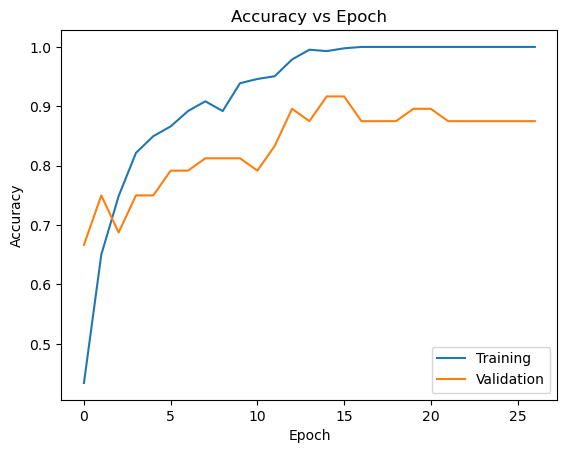

4/4 [==============================] - 0s 1ms/step - loss: 0.8478 - accuracy: 0.7731
Test Loss: 0.8477656841278076
Test Accuracy: 0.7731092572212219
4/4 [==============================] - 0s 1ms/step


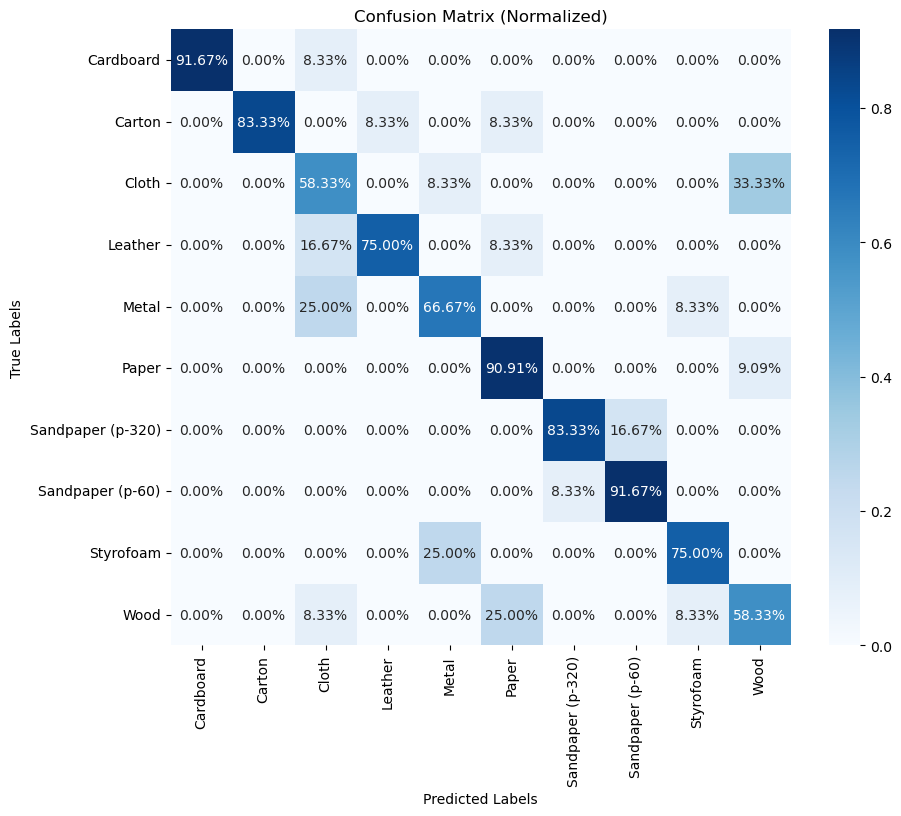

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import os, time

# Specify the directory path
data_dir = '../../preprocessed dataset/filtered dataset/full_dataset_summary.csv'

df = pd.read_csv(data_dir)

# Split features and target variable
features = df[['Fx', 'VarE_Fx', 'Fy', 'VarE_Fy', 'Fz', 'Var_Fy', 'Var_Fz', 'Var_Fx', 'Corr_FxFz', 'Corr_FxFy',
               'Corr_FyFz','Tangential Force', 'VarE_Fz', 'Frictional Coefficient']]
target = df['Material']

# Encode the target variable using label encoding
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Normalize the input features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Save the trained scaler
scaler_filename = './scalar files/standard_scaler_6.pkl'
joblib.dump(scaler, scaler_filename)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target_encoded, test_size=0.2, 
                                                    stratify=target_encoded, random_state=66)
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=66)

# Convert the target back to one-hot encoding for training, validation, and testing sets
y_train_onehot = keras.utils.to_categorical(y_train)
y_val_onehot = keras.utils.to_categorical(y_val)
y_test_onehot = keras.utils.to_categorical(y_test)


# Define the input layer
inputs = Input(shape=(features.shape[1]))

# Define the hidden layers
x = Dense(256, activation='relu')(inputs)
x = Dense(256, activation='relu')(x)

# Define the output layer
outputs = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5)

# Define the start time
start_time = time.time()

# Train the model with validation data
history = model.fit(X_train, y_train_onehot, callbacks=[reduce_lr], 
                    epochs=27, batch_size=1, validation_data=(X_val, y_val_onehot))

# Calculate the total time for training
end_time = time.time()
training_time = end_time - start_time
print("Total Training Time: {:.2f} seconds".format(training_time))

# Plot accuracy vs epoch for training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Get predicted labels on test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert predicted labels back to original form
y_pred_original_labels = label_encoder.inverse_transform(y_pred_labels)

# Save label encoder classes
np.save('./label encoder files/label_encoder_classes_6.npy', label_encoder.classes_)

# Compute confusion matrix on test data
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Compute the sum of true labels for each class
class_totals = np.sum(conf_matrix, axis=1, keepdims=True)

# Normalize the confusion matrix to represent percentages
conf_matrix_norm = conf_matrix / class_totals

# Plot confusion matrix for test data
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.show()

model.save('./model files/material_classification_model_6.h5')